In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dfx=pd.read_csv("data.csv")
print(dfx)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M       17.990         10.38          122.80     1001.0   
1      842517         M       20.570         17.77          132.90     1326.0   
2    84300903         M       19.690         21.25          130.00     1203.0   
3    84348301         M       11.420         20.38           77.58      386.1   
4    84358402         M       20.290         14.34          135.10     1297.0   
5      843786         M       12.450         15.70           82.57      477.1   
6      844359         M       18.250         19.98          119.60     1040.0   
7    84458202         M       13.710         20.83           90.20      577.9   
8      844981         M       13.000         21.82           87.50      519.8   
9    84501001         M       12.460         24.04           83.97      475.9   
10     845636         M       16.020         23.24          102.70      797.8   
11   84610002         M     

In [11]:
x=dfx.drop(columns="id")
x=x.drop(columns="texture_mean")
x=x.drop(columns="perimeter_mean")
x=x.drop(columns="area_mean")
print(x)

    diagnosis  radius_mean  smoothness_mean  compactness_mean  concavity_mean  \
0           M       17.990          0.11840           0.27760        0.300100   
1           M       20.570          0.08474           0.07864        0.086900   
2           M       19.690          0.10960           0.15990        0.197400   
3           M       11.420          0.14250           0.28390        0.241400   
4           M       20.290          0.10030           0.13280        0.198000   
5           M       12.450          0.12780           0.17000        0.157800   
6           M       18.250          0.09463           0.10900        0.112700   
7           M       13.710          0.11890           0.16450        0.093660   
8           M       13.000          0.12730           0.19320        0.185900   
9           M       12.460          0.11860           0.23960        0.227300   
10          M       16.020          0.08206           0.06669        0.032990   
11          M       15.780  

In [12]:
x=x.values
print(x)

[['M' 17.99 0.1184 ... 0.4601 0.1189 nan]
 ['M' 20.57 0.08474 ... 0.275 0.08902 nan]
 ['M' 19.69 0.1096 ... 0.3613 0.08757999999999999 nan]
 ...
 ['M' 16.6 0.08455 ... 0.2218 0.0782 nan]
 ['M' 20.6 0.1178 ... 0.4087 0.124 nan]
 ['B' 7.76 0.052629999999999996 ... 0.2871 0.07039 nan]]


In [13]:
print(x.shape)

(569, 29)


In [61]:
Y=x[:,0]
X=x[:,1:3]
print(X)
print(Y)

[[17.99 0.1184]
 [20.57 0.08474]
 [19.69 0.1096]
 ...
 [16.6 0.08455]
 [20.6 0.1178]
 [7.76 0.052629999999999996]]
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 

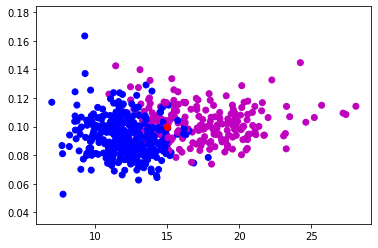

In [73]:
plt.scatter(X[:,0],X[:,1],c=Y)
queryx=np.array([15,0.10])
plt.scatter(queryx[0],queryx[1],color="red")
plt.show()

In [74]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [75]:
def knn(X,Y,queryx,k=5):
    vals=[]
    m=X.shape[0]
    print(m)
    for i in range(m):
        d=dist(X[i],queryx)
        vals.append((d,Y[i]))
        
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    new=np.unique(vals[:,1],return_counts=True)
    index=new[1].argmax()
    pred=new[0][index]
    print(pred)

In [76]:
knn(X,Y,queryx)

569
B
